# Instacart Grocery Basket Analysis (cont.)

In [71]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [72]:
path = r'/Users/selcenayranci/Desktop/4th Achievement -  Instacart Basket Analysis March 2024'

In [73]:
ords_prods_cus = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_prods_cus_2.pkl'))

## Question 9. Visulisations
### Ordering Behaviour Analysis

#### 9.1 Busiest Days and Hours

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '6'),
  Text(3, 0, '2'),
  Text(4, 0, '5'),
  Text(5, 0, '3'),
  Text(6, 0, '4')])

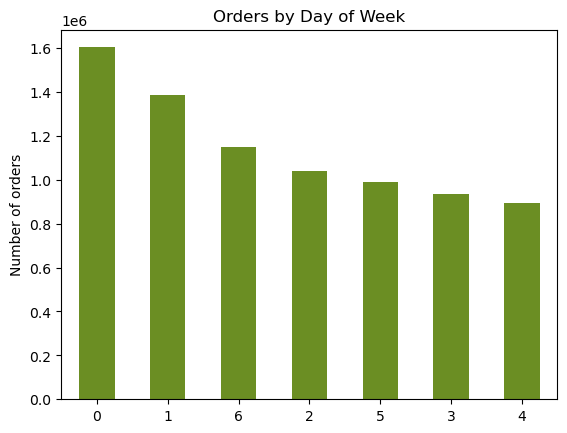

In [76]:
# Creating a bar chart to find the busiest days for orders

bar_ords_dow = ords_prods_cus['orders_day_of_week'].value_counts().plot.bar(
    x='orders_day_of_week', 
    y='Number of orders', 
    title='Orders by Day of Week', 
    color='olivedrab')
plt.xlabel('')
plt.ylabel('Number of orders')
plt.xticks(rotation=0)

In [77]:
# Exporting the chart

bar_ords_dow.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_orders_day_of_week.png'), bbox_inches='tight')

Text(0, 0.5, 'Frequency')

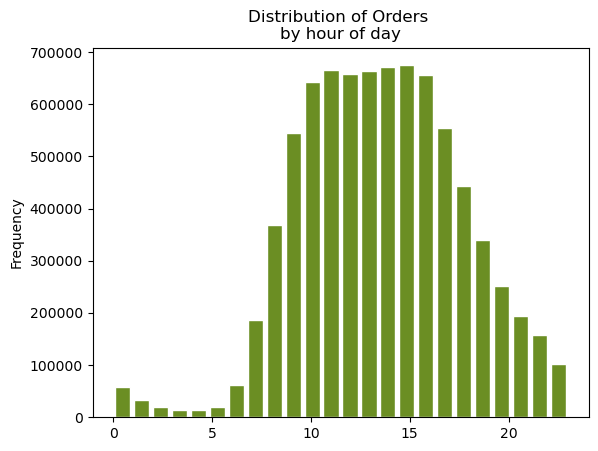

In [78]:
# Creating a histogram to find the busiest hours in a day for orders

hist_ords_hod = ords_prods_cus['order_hour_of_day'].plot.hist(
    bins = 24, 
    grid = False, 
    title='Distribution of Orders \nby hour of day', 
    color='olivedrab', 
    edgecolor='white', 
    rwidth=0.8)
plt.ylabel('Frequency')

In [79]:
# Exporting the chart

hist_ords_hod.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'hist_orders_hour_of_day.png'), bbox_inches='tight')

#### 9.2 Prices by hour of day

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Prices')

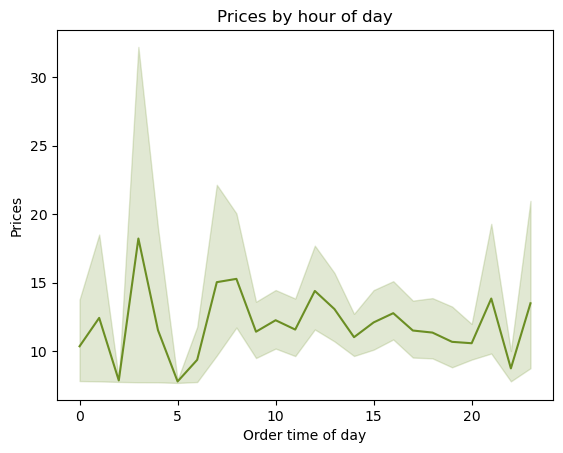

In [80]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cus)) <= 0.7

big = ords_prods_cus[dev] # Store 70% of the sample in the dataframe big
small = ords_prods_cus[~dev] # Store 30% of the sample in the dataframe small

sample = small[['order_hour_of_day', 'prices']] # Creating a sample

# Creating a line chart

line_prices_ord_hod = sns.lineplot(data = sample, x = 'order_hour_of_day', y = 'prices', color= 'olivedrab')
plt.title('Prices by hour of day')
plt.xlabel('Order time of day')
plt.ylabel('Prices')

In [81]:
# Exporting the chart

line_prices_ord_hod.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_prices_order_hour_of_day.png'), bbox_inches='tight')

#### 9.3 Product Price Range Groupings

Text(0, 0.5, '')

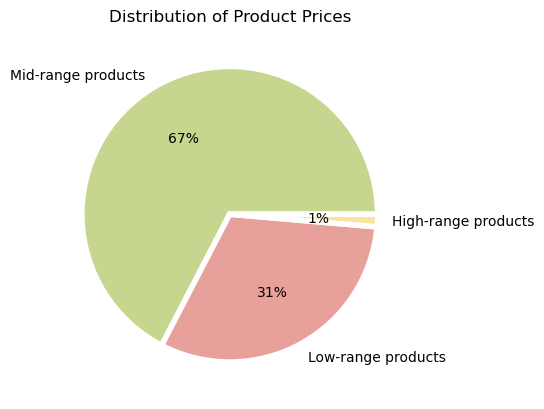

In [82]:
# Creating a pie chart for price ranges

pie_prices = ords_prods_cus['price_range_loc'].value_counts().plot.pie(
    labels = ('Mid-range products', 'Low-range products', 'High-range products'), 
    title = 'Distribution of Product Prices', 
    colors = ['#C6D68F', '#E8A09A', '#FBE29F'], 
    autopct = '%1.0f%%', 
    wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' })
plt.ylabel('')

In [83]:
# Exporting the chart

pie_prices.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_prices.png'), bbox_inches='tight')

#### 9.4 Popular Products

Text(0, 0.5, '')

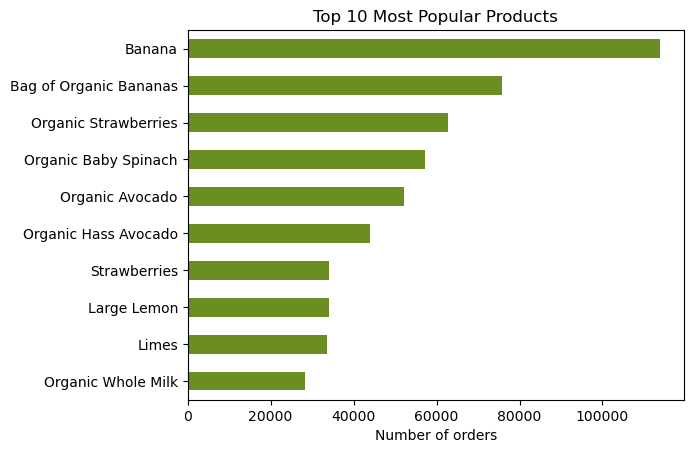

In [84]:
# Finding the most popular products

bar_popular_prods = ords_prods_cus['product_name'].value_counts(dropna=False).head(10).sort_values(ascending = True).plot.barh(
        title = 'Top 10 Most Popular Products', 
        color = 'olivedrab')
plt.xlabel('Number of orders')
plt.ylabel('')

In [85]:
# Exporting the chart

bar_popular_prods.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_popular_products.png'), bbox_inches='tight')

Text(0, 0.5, '')

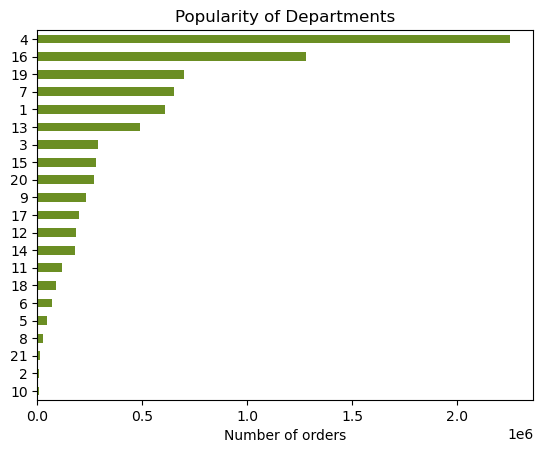

In [87]:
# Finding the most popular departments

bar_popular_dept = ords_prods_cus['department_id'].value_counts(dropna=False).sort_values(ascending = True).plot.barh(
        title = 'Popularity of Departments', 
        color = 'olivedrab')
plt.xlabel('Number of orders')
plt.ylabel('')

In [88]:
# Exporting the chart

bar_popular_dept.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_popular_departments.png'), bbox_inches='tight')

#### 9.5 Brand Loyalty Distribution

Text(0, 0.5, '')

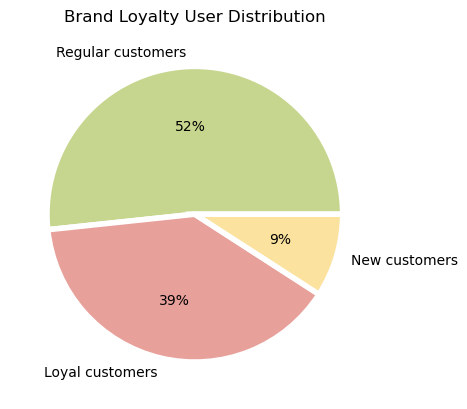

In [89]:
# Creating a pie chart for brand loyalty user count

pie_loyalty = ords_prods_cus['loyalty_flag'].value_counts().plot.pie( 
    labels = ('Regular customers', 'Loyal customers', 'New customers'), 
    title = 'Brand Loyalty User Distribution', 
    colors = ['#C6D68F', '#E8A09A', '#FBE29F'], 
    autopct = '%1.0f%%', 
    wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' })
plt.ylabel('')

In [90]:
# Exporting the chart

pie_loyalty.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_loyalty.png'), bbox_inches='tight')

#### 9.6 Ordering Habits by Loyalty Status

##### Spending habits by loyalty status

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

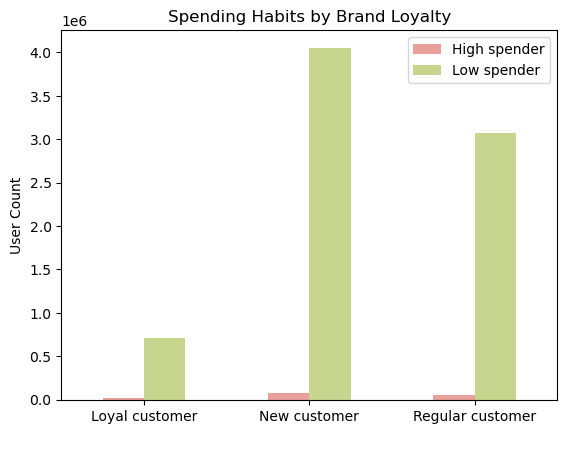

In [95]:
# Group spending flag by loyalty flag
spending_by_loyalty = ords_prods_cus.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

# Plotting the bar
bar_spending_by_loyalty = spending_by_loyalty.plot(kind='bar', color=['#E8A09A', '#C6D68F'])
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habits by Brand Loyalty')
plt.xticks(rotation=0)

In [96]:
# Exporting the chart

bar_spending_by_loyalty.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_spending_by_loyalty.png'), bbox_inches='tight')

##### Order Frequency by Loyalty Status

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

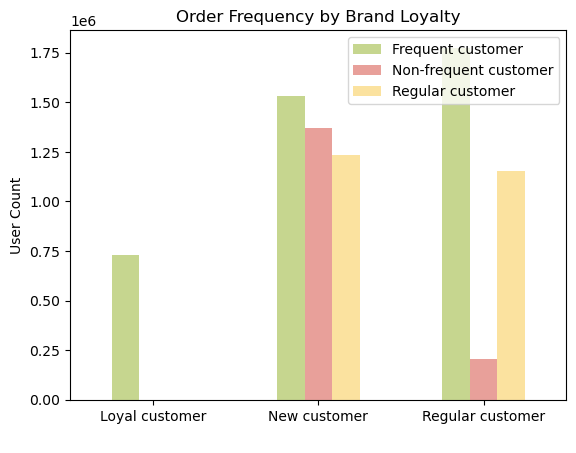

In [97]:
# Group frequency flag by loyalty flag
order_freq_loyalty = ords_prods_cus.groupby(['loyalty_flag', 'order_frequency_flag']).size().unstack()

# Plot the bar 
bar_order_freq_loyalty = order_freq_loyalty.plot(kind='bar', color=['#C6D68F', '#E8A09A', '#FBE29F', '#9F8FD6'])
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Brand Loyalty')
plt.xticks(rotation=0)

In [98]:
# Exporting the chart

bar_order_freq_loyalty.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_order_freq_loyalty.png'), bbox_inches='tight')

##### Busiest Days for Orders by Brand Loyalty 

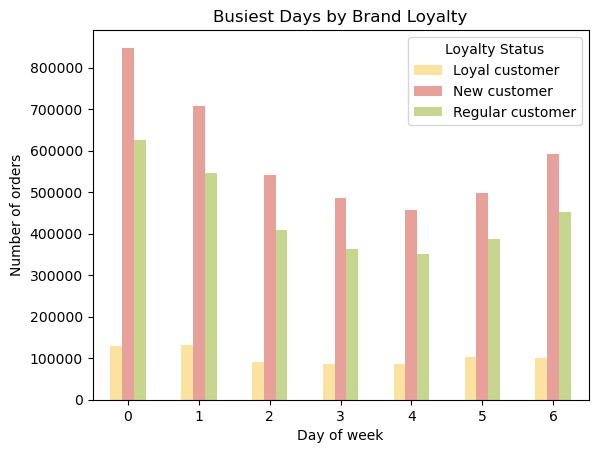

In [99]:
# Group by loyalty status and days of orders
loyalty_avg_orders = ords_prods_cus.groupby(['orders_day_of_week', 'loyalty_flag']).size().unstack()

# Plotting the unstacked bar graph
bar_loyalty_avg_orders = loyalty_avg_orders.plot(kind='bar', stacked=False, color=['#FBE29F', '#E8A09A', '#C6D68F'])
plt.title('Busiest Days by Brand Loyalty')
plt.xlabel('Day of week')
plt.ylabel('Number of orders')
plt.xticks(rotation=0)
plt.legend(title='Loyalty Status')

In [100]:
# Exporting the chart

bar_loyalty_avg_orders.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_loyalty_avg_orders.png'), bbox_inches='tight')

#### 9.7 Ordering Habits Based on Region
##### Brand Loyalty by Region

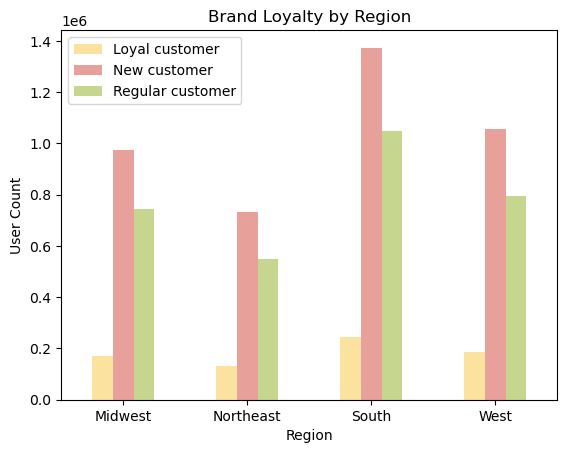

In [101]:
# Group loyalty status by region
loyalty_region_counts = ords_prods_cus.groupby(['Region', 'loyalty_flag']).size().unstack()

# Plotting the unstacked bar graph
bar_loyalty_region_counts = loyalty_region_counts.plot(kind='bar', stacked=False, color=['#FBE29F', '#E8A09A', '#C6D68F'])
plt.title('Brand Loyalty by Region')
plt.xlabel('Region')
plt.ylabel('User Count')
plt.xticks(rotation=0)
plt.legend(title='')

In [102]:
# Exporting the chart

bar_loyalty_region_counts.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_loyalty_region_counts.png'), bbox_inches='tight')

##### Spending Habits by Region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

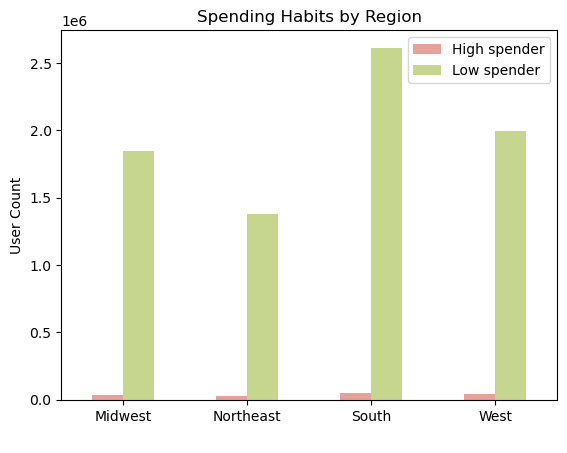

In [103]:
# Group spending flag by region
spend_by_region = ords_prods_cus.groupby(['Region', 'spending_flag']).size().unstack()

# Ploting the bar plot 
bar_spend_by_region = spend_by_region.plot(kind='bar', color=['#E8A09A', '#C6D68F'])
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habits by Region')
plt.xticks(rotation=0)

In [104]:
# Exporting the chart

bar_spend_by_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_spend_by_region.png'), bbox_inches='tight')

##### Order frequency by region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

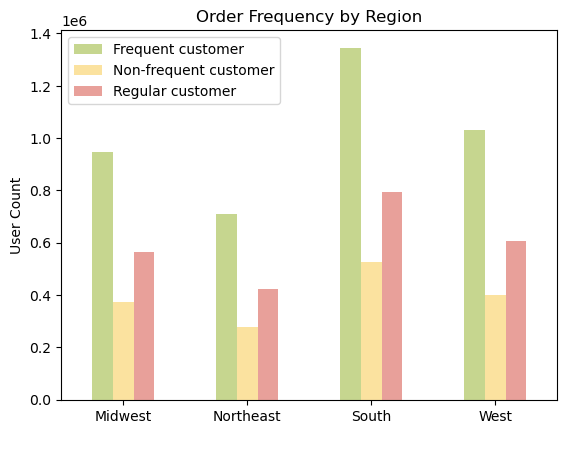

In [105]:
# Group order frequncy by region
order_freq_by_region = ords_prods_cus.groupby(['Region', 'order_frequency_flag']).size().unstack()

# Plotting the bar plot 
bar_order_freq_by_region = order_freq_by_region.plot(kind='bar', color=['#C6D68F', '#FBE29F', '#E8A09A'])
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Region')
plt.xticks(rotation=0)

In [106]:
# Exporting the chart

bar_order_freq_by_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_order_freq_by_region.png'), bbox_inches='tight')

#### 9.8 Ordering Habits Base on Age and Family Status

In [107]:
# Define age groups
ords_prods_cus.loc[(ords_prods_cus['Age'] < 40),'age_profile'] = 'Young Adult'
ords_prods_cus.loc[(ords_prods_cus['Age'] >= 40) & (ords_prods_cus['Age'] < 60) ,'age_profile'] = 'Middle Age'
ords_prods_cus.loc[(ords_prods_cus['Age'] >= 60) ,'age_profile'] = 'Senior'

##### Brand Loyalty by Age

(array([0, 1, 2]),
 [Text(0, 0, 'Middle Age'), Text(1, 0, 'Senior'), Text(2, 0, 'Young Adult')])

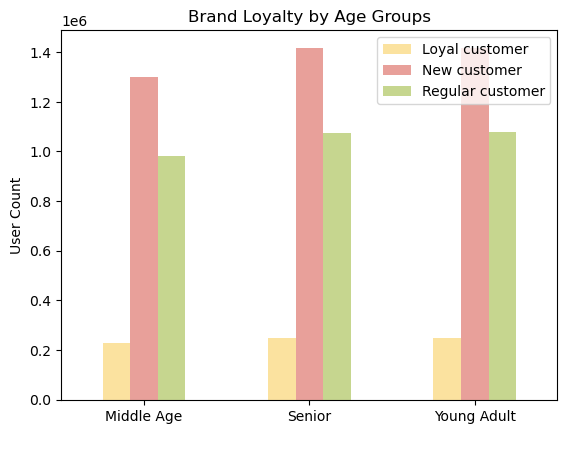

In [108]:
# Group age profiles by loyalty
age_by_loyalty = ords_prods_cus.groupby(['age_profile', 'loyalty_flag']).size().unstack()

# Plotting the bar plot 
bar_age_by_loyalty = age_by_loyalty.plot(kind='bar', color=['#FBE29F', '#E8A09A', '#C6D68F'])
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Age Groups')
plt.xticks(rotation=0)

In [109]:
# Exporting the chart

bar_age_by_loyalty.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_age_by_loyalty.png'), bbox_inches='tight')

##### Spending Habits by Age 

(array([0, 1, 2]),
 [Text(0, 0, 'Middle Age'), Text(1, 0, 'Senior'), Text(2, 0, 'Young Adult')])

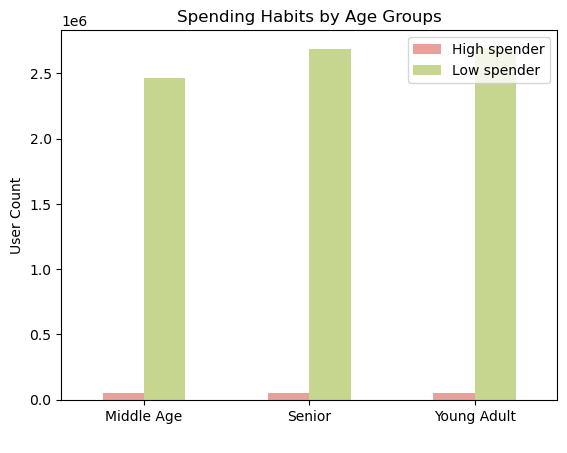

In [110]:
# Grouping spending by age
spending_by_age = ords_prods_cus.groupby(['age_profile', 'spending_flag']).size().unstack()

# Plotting the bar plot 
bar_spending_by_age = spending_by_age.plot(kind='bar', color=['#E8A09A', '#C6D68F'])
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habits by Age Groups')
plt.xticks(rotation=0)

In [111]:
# Exporting the chart

bar_spending_by_age.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_spending_by_age.png'), bbox_inches='tight')

##### Order Frequency by Age

(array([0, 1, 2]),
 [Text(0, 0, 'Middle Age'), Text(1, 0, 'Senior'), Text(2, 0, 'Young Adult')])

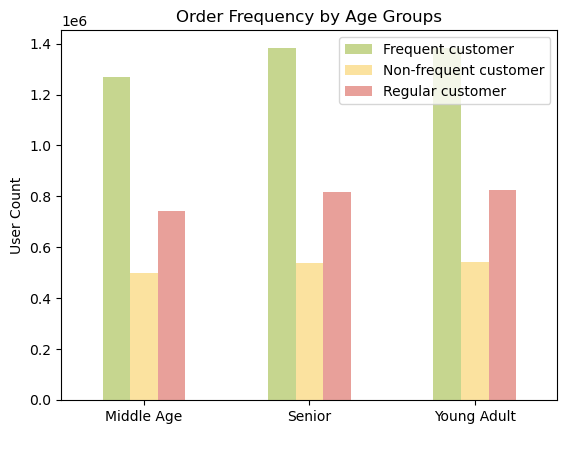

In [112]:
# Grouping order frequency by age

order_freq_by_age = ords_prods_cus.groupby(['age_profile', 'order_frequency_flag']).size().unstack()

# Plotting the bar plot
bar_order_freq_by_age = order_freq_by_age.plot(kind='bar', color=['#C6D68F', '#FBE29F', '#E8A09A'])
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Age Groups')
plt.xticks(rotation=0)

In [113]:
# Exporting the chart

bar_order_freq_by_age.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_order_freq_by_age.png'), bbox_inches='tight')

##### Brand Loyalty by Family Status

Text(0.5, 1.0, 'Brand Loyalty by Family Status')

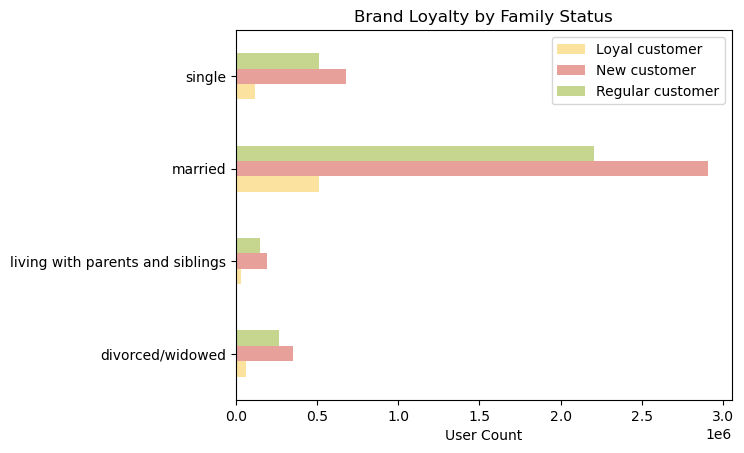

In [114]:
# Grouping loyalty by family status

loyalty_by_fam_status = ords_prods_cus.groupby(['fam_status', 'loyalty_flag']).size().unstack()

# Plotting the bar plot
bar_loyalty_by_fam_status = loyalty_by_fam_status.plot(kind='barh', color=['#FBE29F', '#E8A09A', '#C6D68F'])
plt.legend(title=None)
plt.xlabel('User Count')
plt.ylabel('')
plt.title('Brand Loyalty by Family Status')

In [115]:
# Exporting the chart

bar_loyalty_by_fam_status.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_loyalty_by_fam_status.png'), bbox_inches='tight')

##### Spending habits by family status

Text(0.5, 1.0, 'Spending Habits by Family Status')

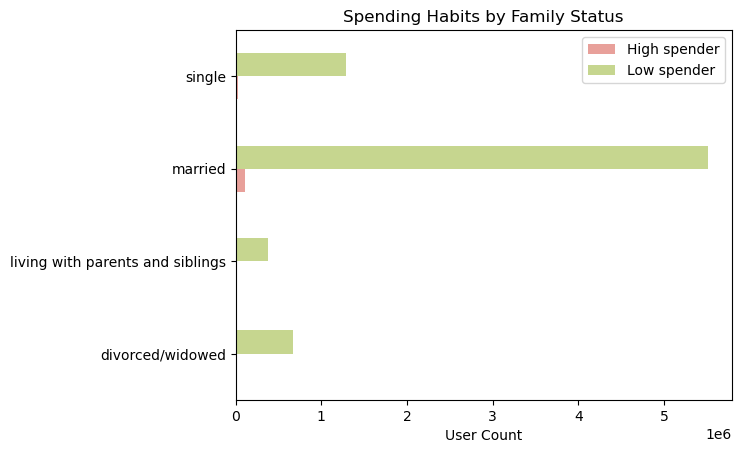

In [116]:
# Grouping spending by family status

spending_by_fam_status = ords_prods_cus.groupby(['fam_status', 'spending_flag']).size().unstack()

# Plotting the bar plot
bar_spending_by_fam_status = spending_by_fam_status.plot(kind='barh', color=['#E8A09A', '#C6D68F'])
plt.legend(title=None)
plt.xlabel('User Count')
plt.ylabel('')
plt.title('Spending Habits by Family Status')

In [117]:
# Exporting the chart

bar_spending_by_fam_status.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_spending_by_fam_status.png'), bbox_inches='tight')

##### Order Frequency by Family Status

Text(0.5, 1.0, 'Order Frequency by Family Status')

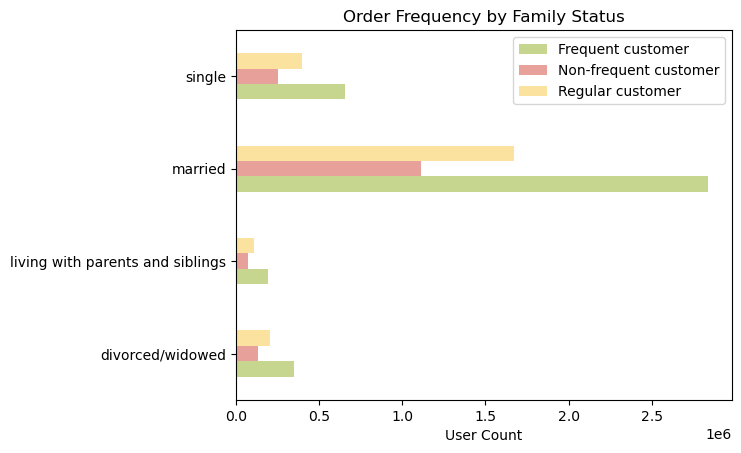

In [118]:
# Grouping spending by family status

order_freq_by_fam_status = ords_prods_cus.groupby(['fam_status', 'order_frequency_flag']).size().unstack()

# Plotting the bar plot
bar_order_freq_by_fam_status = order_freq_by_fam_status.plot(kind='barh', color=['#C6D68F', '#E8A09A', '#FBE29F'])
plt.legend(title=None)
plt.xlabel('User Count')
plt.ylabel('')
plt.title('Order Frequency by Family Status')

In [119]:
# Exporting the chart

bar_order_freq_by_fam_status.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_order_freq_by_fam_status.png'), bbox_inches='tight')

#### 9.9 Ordering Habits Based on Demographic Information
##### Brand Loyalty by Customer Profile

Text(0.5, 1.0, 'Brand Loyalty by Customer Profiles')

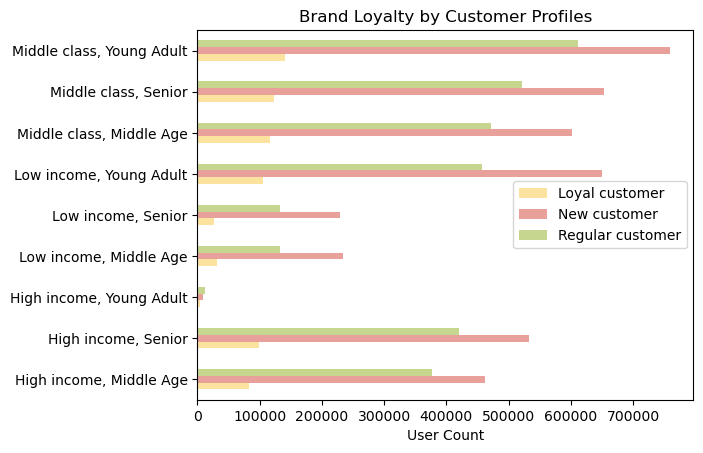

In [120]:
# Grouping loyalty by customer profile

loyalty_by_cus = ords_prods_cus.groupby(['Customer Profile', 'loyalty_flag']).size().unstack()

# Plotting the bar plot
bar_loyalty_by_cus = loyalty_by_cus.plot(kind='barh', color=['#FBE29F', '#E8A09A', '#C6D68F'])
plt.legend(title=None)
plt.xlabel('User Count')
plt.ylabel('')
plt.title('Brand Loyalty by Customer Profiles')

In [121]:
# Exporting the chart

bar_loyalty_by_cus.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_loyalty_by_cus.png'), bbox_inches='tight')

##### Spending Habits by Customer Profiles

Text(0.5, 1.0, 'Spending by Customer Profiles')

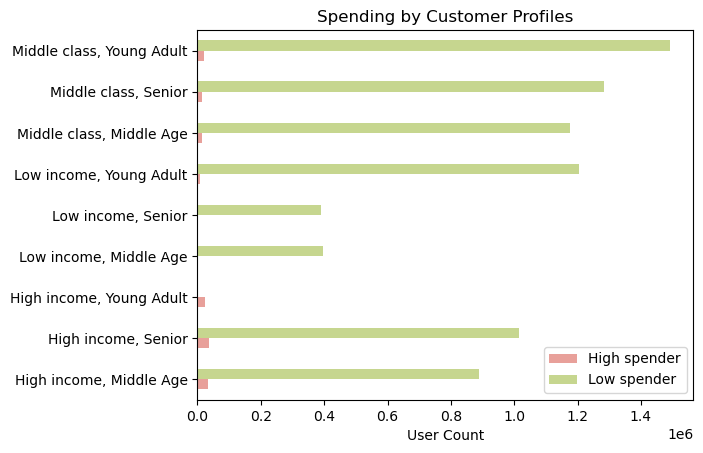

In [122]:
# Grouping spending by customer profiles

spending_by_cus = ords_prods_cus.groupby(['Customer Profile', 'spending_flag']).size().unstack()

# Plotting the bar plot
bar_spending_by_cus = spending_by_cus.plot(kind='barh', color=['#E8A09A', '#C6D68F'])
plt.legend(title=None)
plt.xlabel('User Count')
plt.ylabel('')
plt.title('Spending by Customer Profiles')

In [123]:
# Exporting the chart

bar_spending_by_cus.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_spending_by_cus.png'), bbox_inches='tight')

####  9.10 Ordering Habits of Customer Profiles
##### Price of Orders

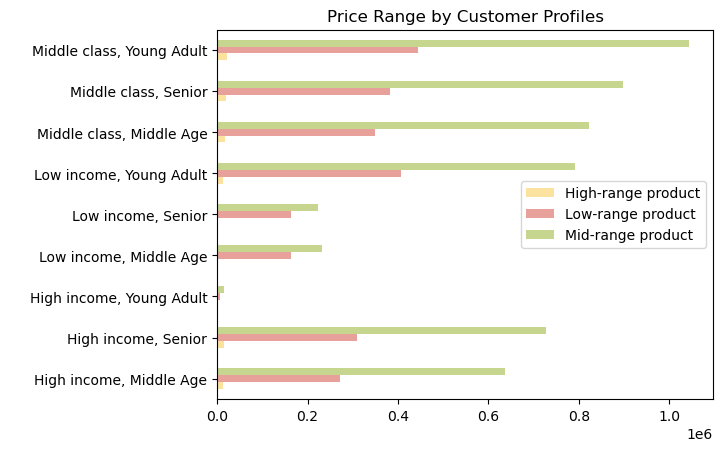

In [124]:
# Group price range by customer profile
price_by_cus = ords_prods_cus.groupby(['Customer Profile', 'price_range_loc']).size().unstack()

# Plotting the bar plot
bar_price_by_cus = price_by_cus.plot(kind='barh', color = ['#FBE29F', '#E8A09A', '#C6D68F'])
plt.ylabel(' ')
plt.title('Price Range by Customer Profiles')
plt.legend(title =None)

In [125]:
# Exporting the chart

bar_price_by_cus.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_price_by_cus.png'), bbox_inches='tight')

##### Order Frequency by Customer Profiles

Text(0.5, 1.0, 'Order Frequency by Customer Profiles')

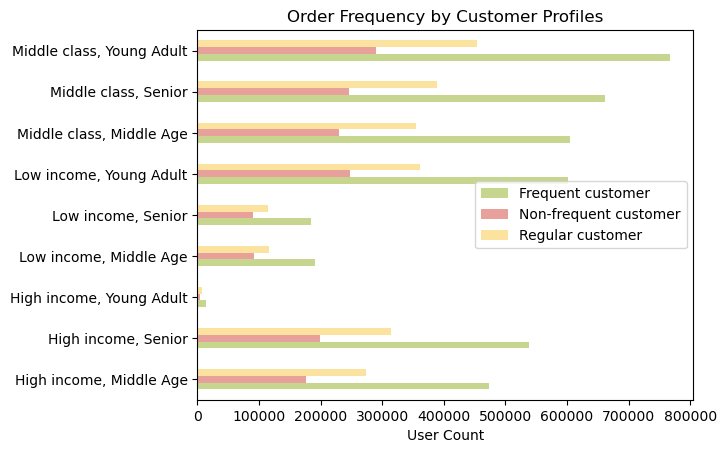

In [126]:
# Grouping order frequency by customer profiles

order_freq_by_cus = ords_prods_cus.groupby(['Customer Profile', 'order_frequency_flag']).size().unstack()

# Plotting the bar plot
bar_order_freq_by_cus = order_freq_by_cus.plot(kind='barh', color=['#C6D68F', '#E8A09A', '#FBE29F'])
plt.legend(title=None)
plt.xlabel('User Count')
plt.ylabel('')
plt.title('Order Frequency by Customer Profiles')

In [127]:
# Exporting the chart

bar_order_freq_by_cus.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_order_freq_by_cus.png'), bbox_inches='tight')

##### Popular Departments by Customer Profiles

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21')])

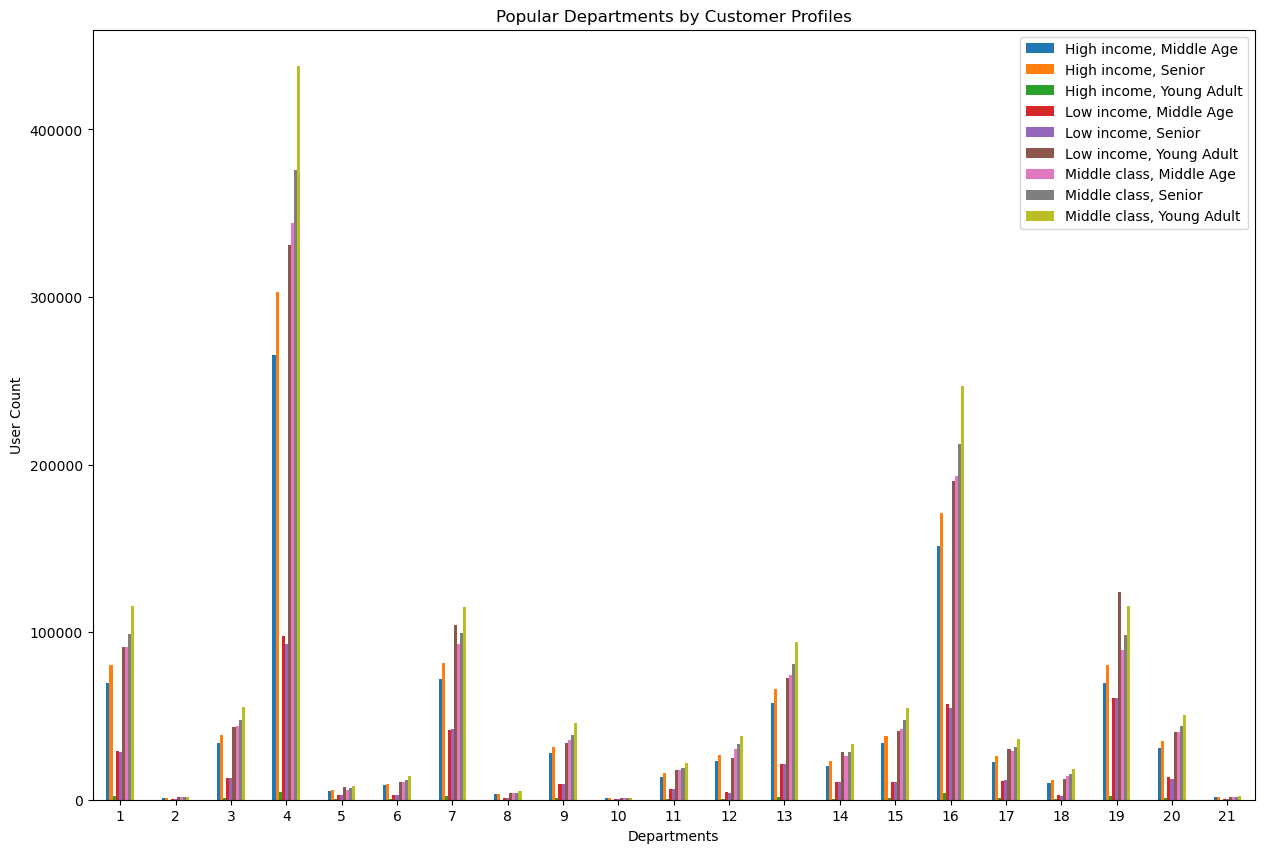

In [129]:
# Grouping department_id by customer profiles

dept_by_cus = ords_prods_cus.groupby(['department_id', 'Customer Profile']).size().unstack()

# Plotting the bar plot
bar_dept_by_cus = dept_by_cus.plot(kind='bar', figsize=(15, 10))
plt.legend(title=None)
plt.xlabel('Departments')
plt.ylabel('User Count')
plt.title('Popular Departments by Customer Profiles')
plt.xticks(rotation=0)

In [130]:
# Exporting the chart

bar_dept_by_cus.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_dept_by_cus.png'), bbox_inches='tight')

In [131]:
ords_prods_cus.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_prods_cus_final.pkl'))